Прогнозирование отмены бронирования отелей
🏨 Информация
Вы поддерживаете отель в рамках проекта, направленного на увеличение доходов от бронирования номеров. Они верят, что могут использовать науку о данных, чтобы помочь им сократить количество отмен.

Они попросили вас использовать любую подходящую методологию, чтобы определить, что влияет на то, будет ли бронирование выполнено или отменено. Они намерены использовать результаты вашей работы, чтобы уменьшить вероятность того, что кто-то отменит их бронирование.


In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import sklearn

In [2]:
os.chdir("D:\Analytics\Data")

In [3]:
df = pd.read_csv('Hotel Reservations.csv', index_col='Booking_ID')

In [4]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
Booking_ID,,,,,,,,,,,,,,,,,,
INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled


In [5]:
df.T

Booking_ID,INN00001,INN00002,INN00003,INN00004,INN00005,INN00006,INN00007,INN00008,INN00009,INN00010,...,INN36266,INN36267,INN36268,INN36269,INN36270,INN36271,INN36272,INN36273,INN36274,INN36275
no_of_adults,2,2,1,2,2,2,2,2,3,2,...,2,2,2,1,2,3,2,2,2,2
no_of_children,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
no_of_weekend_nights,1,2,2,0,1,0,1,1,0,0,...,1,2,1,0,0,2,1,2,0,1
no_of_week_nights,2,3,1,2,1,2,3,3,4,5,...,3,2,0,3,1,6,3,6,3,2
type_of_meal_plan,Meal Plan 1,Not Selected,Meal Plan 1,Meal Plan 1,Not Selected,Meal Plan 2,Meal Plan 1,Meal Plan 1,Meal Plan 1,Meal Plan 1,...,Meal Plan 1,Meal Plan 1,Not Selected,Meal Plan 1,Meal Plan 1,Meal Plan 1,Meal Plan 1,Meal Plan 1,Not Selected,Meal Plan 1
required_car_parking_space,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
room_type_reserved,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 4,Room_Type 1,Room_Type 4,...,Room_Type 1,Room_Type 2,Room_Type 1,Room_Type 1,Room_Type 6,Room_Type 4,Room_Type 1,Room_Type 1,Room_Type 1,Room_Type 1
lead_time,224,5,1,211,48,346,34,83,121,44,...,15,8,49,166,0,85,228,148,63,207
arrival_year,2017,2018,2018,2018,2018,2018,2017,2018,2018,2018,...,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018
arrival_month,10,11,2,5,4,9,10,12,7,10,...,5,3,7,11,10,8,10,7,4,12


In [6]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


описание столбцов
Booking_ID: уникальный идентификатор каждого бронирования
no_of_adults: Количество взрослых
no_of_children: Количество детей
no_of_weekend_nights: Количество ночей выходного дня (суббота или воскресенье), на которые гость останавливался или забронировал проживание в отеле
no_of_week_nights: Количество ночей недели (с понедельника по пятницу), на которые гость останавливался или забронировал проживание в отеле
type_of_meal_plan: Тип плана питания, забронированного клиентом:
required_car_parking_space: Требуется ли клиенту место для парковки автомобиля? (0 - Нет, 1- Да)
room_type_reserved: Тип номера, забронированного клиентом. Значения зашифрованы (закодированы) гостиницами INN.
lead_time: Количество дней между датой бронирования и датой
прибытия
arrival_year: Год даты прибытия
arrival_month: Месяц даты прибытия
arrival_date: Дата месяца
market_segment_type: Обозначение сегмента рынка.
repeated_guest: Является ли клиент повторным гостем? (0 - Нет, 1- Да)
no_of_previous_cancellations: количество предыдущих бронирований, которые были отменены клиентом до текущего бронирования
no_of_previous_bookings_not_canceled: Количество предыдущих бронирований, не отмененных клиентом до текущего бронирования
avg_price_per_room: Средняя цена за сутки бронирования; цены на номера являются динамическими. (в евро)
no_of_special_requests: Общее количество специальных запросов, сделанных клиентом (например, высокий этаж, вид из номера и т.д.)
booking_status: Флаг, указывающий, было ли бронирование отменено или нет.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36275 entries, INN00001 to INN36275
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_seg

<Axes: ylabel='booking_status'>

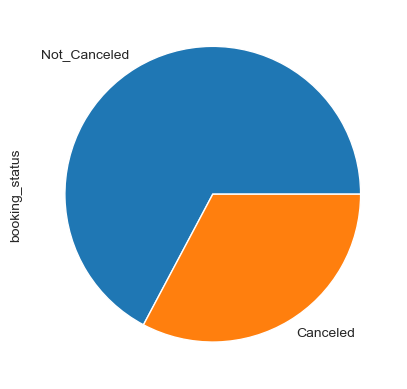

In [8]:
df['booking_status'].value_counts().plot(kind = 'pie',autopct = '')

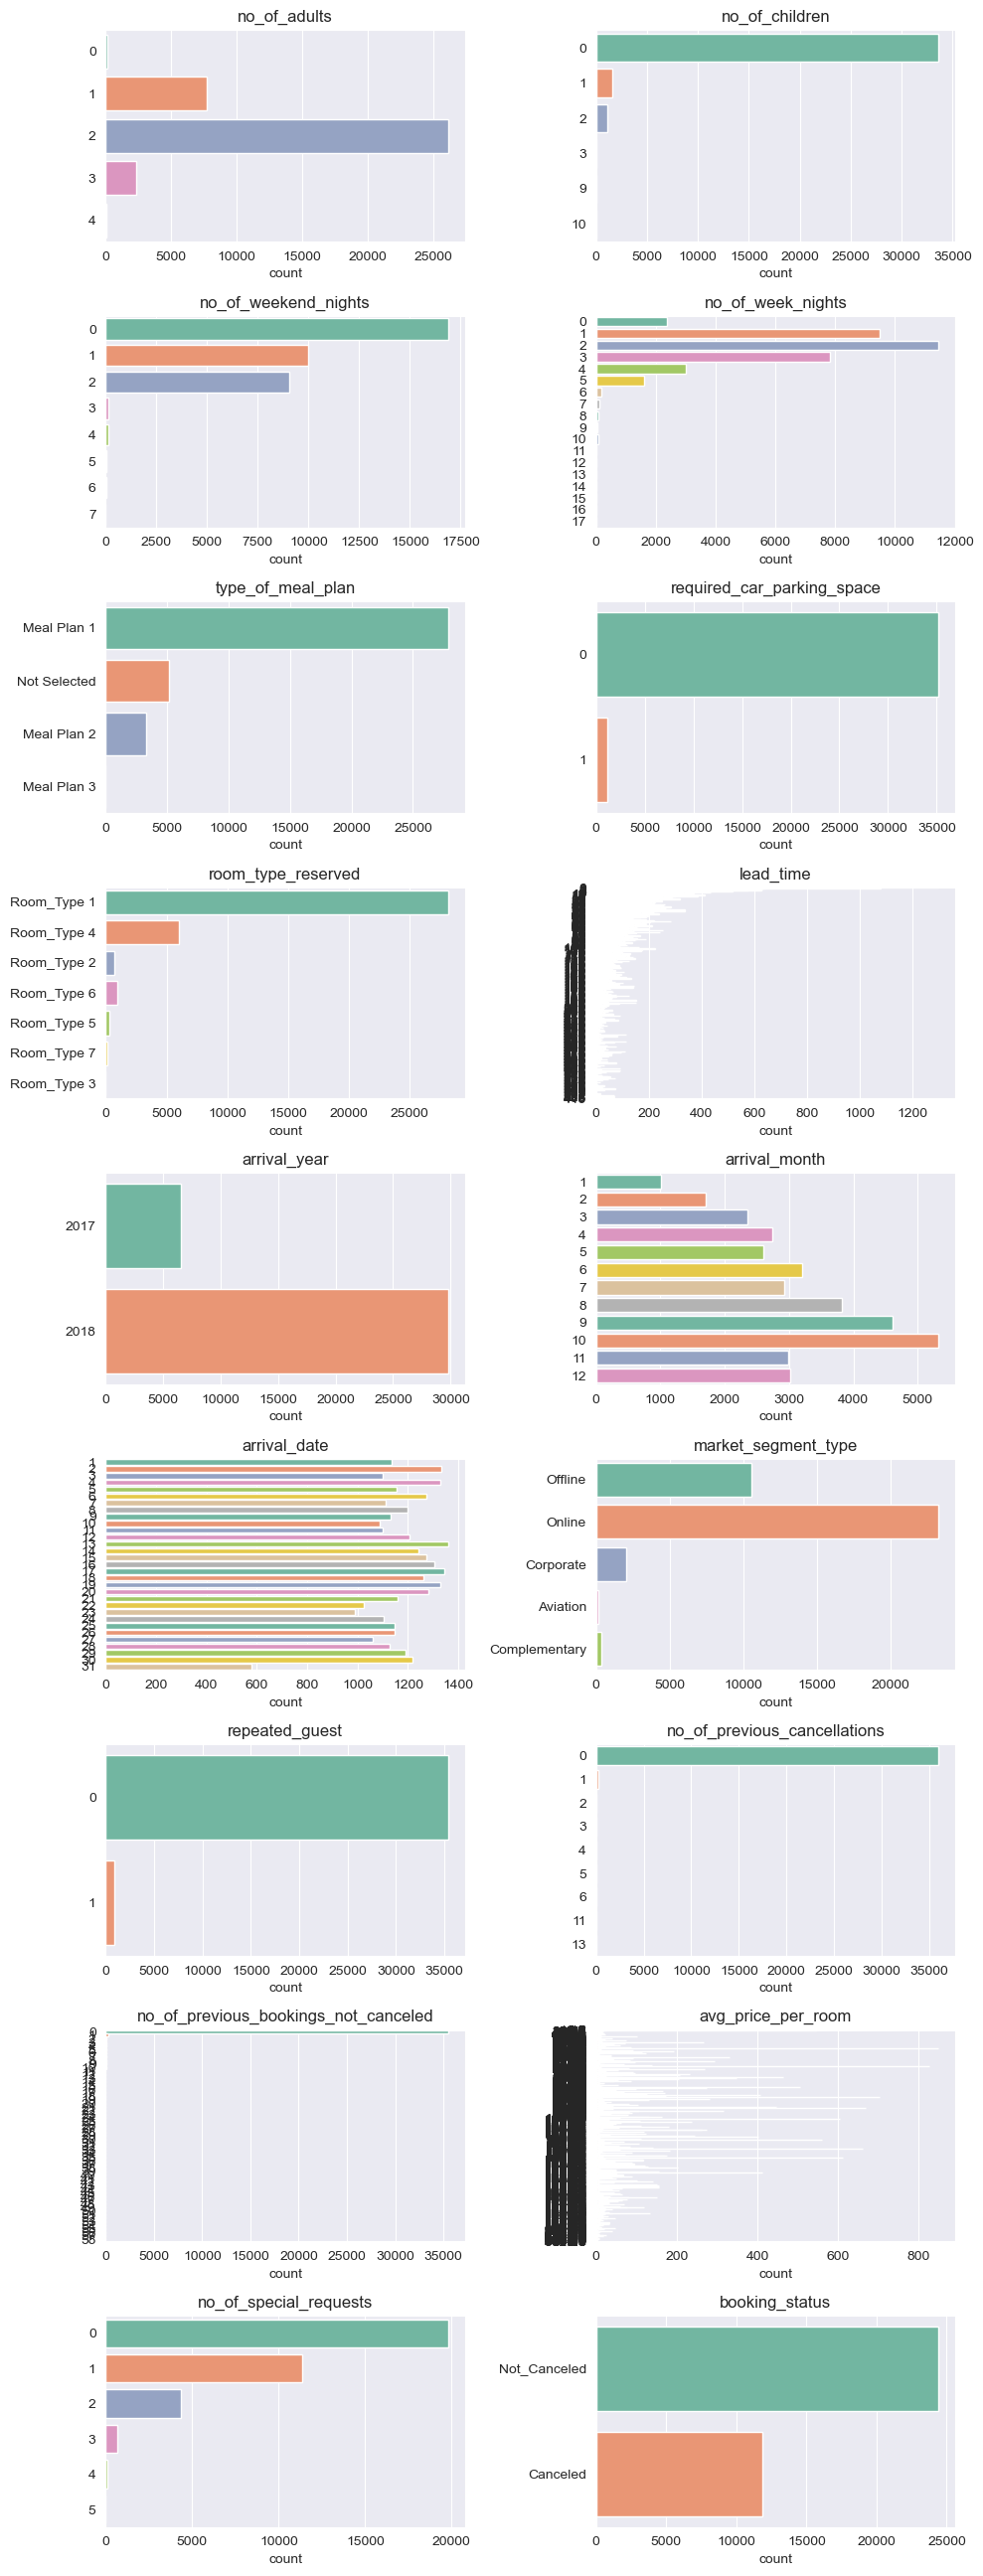

In [9]:
columns = df.columns
plt.figure(figsize=(10,40))
for i,col in enumerate(columns):
    ax = plt.subplot(14,2,i+1)
    sns.countplot(y=df[col],palette = "Set2")
    plt.title(col)
    plt.ylabel(None)
plt.tight_layout()
plt.show()

Данные графики показывают, как распределены данные в наборе

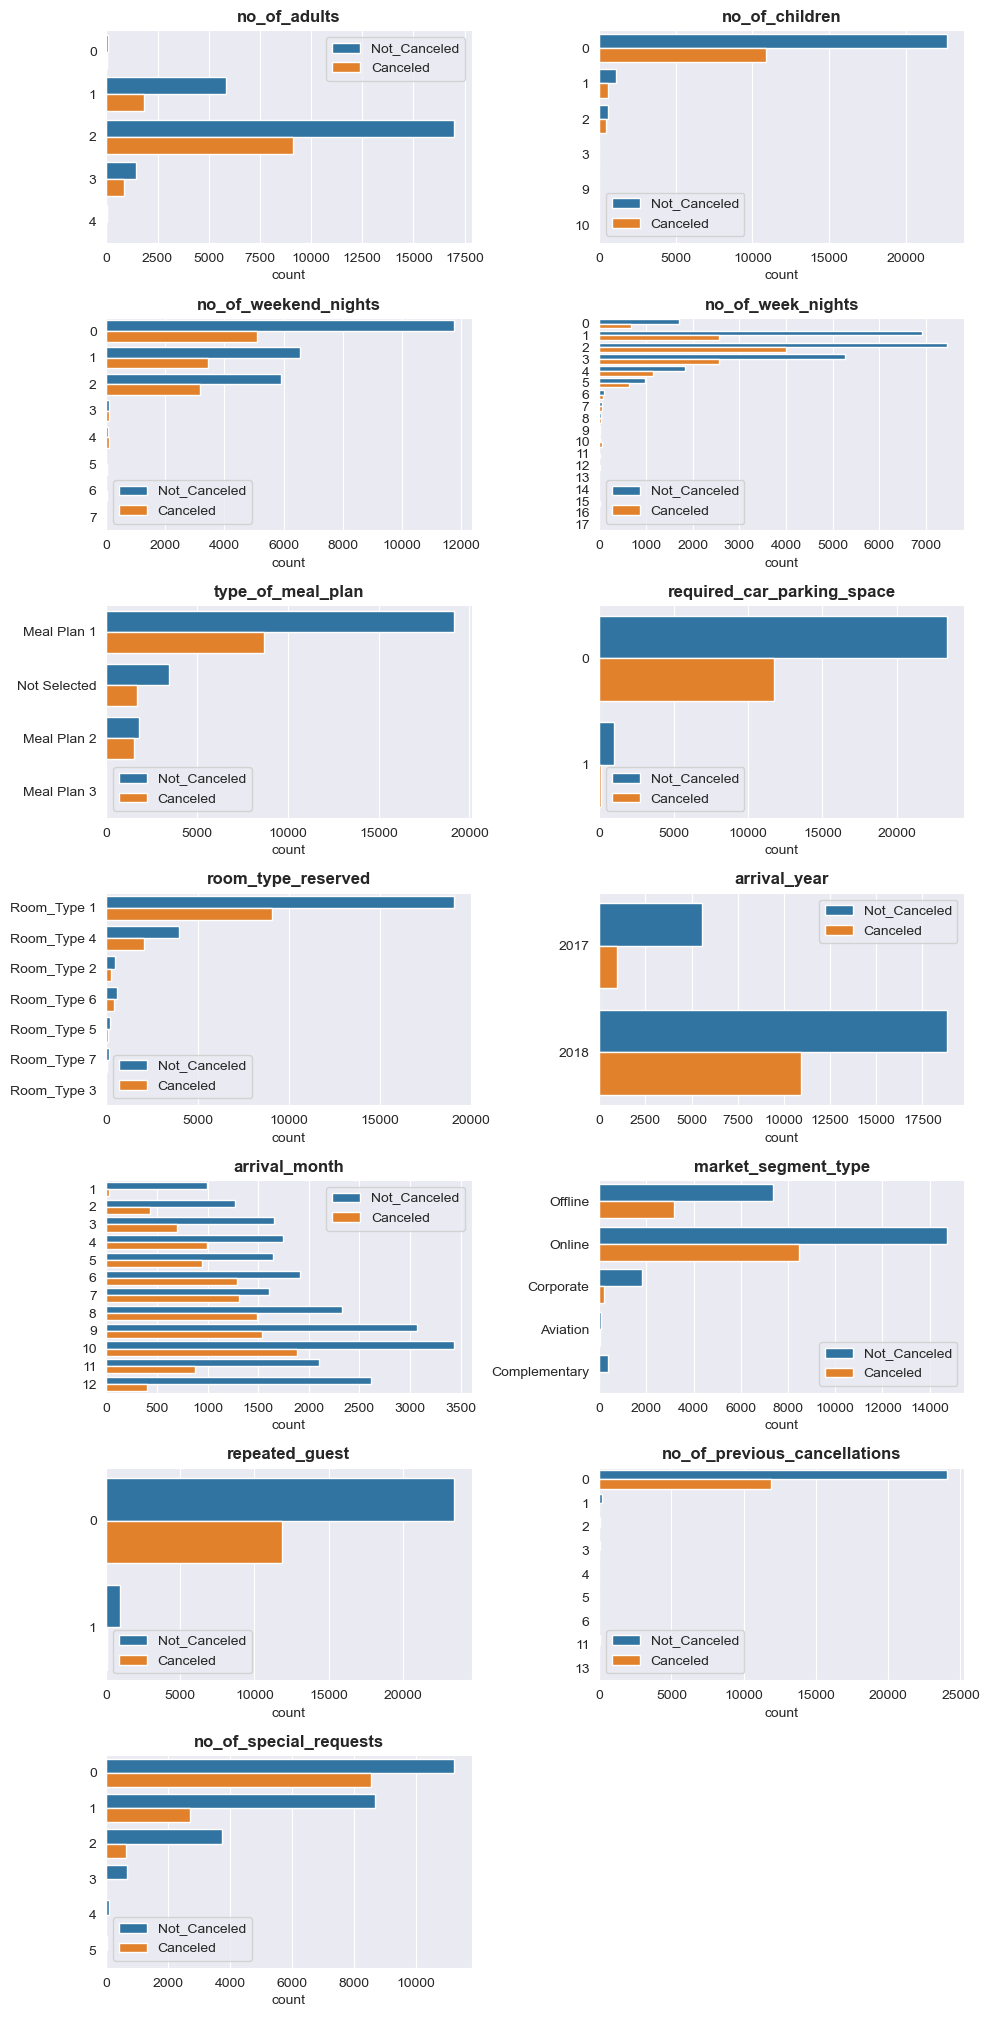

In [10]:
columns = ['no_of_adults','no_of_children','no_of_weekend_nights',
           'no_of_week_nights','type_of_meal_plan','required_car_parking_space',
           'room_type_reserved','arrival_year','arrival_month',
           'market_segment_type','repeated_guest','no_of_previous_cancellations',
           'no_of_special_requests']
plt.figure(figsize=(10,40))
for i,col in enumerate(columns):
    ax = plt.subplot(14,2,i+1)
    sns.countplot(y=df[col], hue=df['booking_status'])
    plt.title(col,fontweight='bold')
    plt.ylabel(None)
    plt.legend(loc='best')
plt.tight_layout()
plt.show()

Начинаем предобработку данных:
1) Удалить все null-значения, а также данные, содержащие пусты ячейки
2) удалить все значения не имеющие смысла (не выбран тип питания, в резервировании нет ни одного взрослого)
3) преобразовать нужные данные, и далее удалить ненужные ячейки (создать новый признак "общее время пребывания" и если он равен нулю -- удалить значение)
4) создать новую колонку "полное время бронирования" для удобного рассмотрения данных
5) создать новую колонку "полное количество гостей"
6) создать колонку "общее количество бронирований", составленную из отмененных и подтвержденных бронирований

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36275 entries, INN00001 to INN36275
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_seg

In [12]:
df.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [13]:
df.no_of_adults.nunique()

5

In [14]:
df['no_of_adults'].value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

Видим 139 значений "0" в графе количество взрослых в бронировании. Данная ситуация может быть ошибкой, а может означать, что дети приехали в отель на соревнования/школьные мероприятия. Но все же будет лучше избавиться от таких данных

In [15]:
df = df.drop(df[df['no_of_adults'] == 0].index)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36136 entries, INN00001 to INN36275
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36136 non-null  int64  
 1   no_of_children                        36136 non-null  int64  
 2   no_of_weekend_nights                  36136 non-null  int64  
 3   no_of_week_nights                     36136 non-null  int64  
 4   type_of_meal_plan                     36136 non-null  object 
 5   required_car_parking_space            36136 non-null  int64  
 6   room_type_reserved                    36136 non-null  object 
 7   lead_time                             36136 non-null  int64  
 8   arrival_year                          36136 non-null  int64  
 9   arrival_month                         36136 non-null  int64  
 10  arrival_date                          36136 non-null  int64  
 11  market_seg

In [17]:
df.isna().count()

no_of_adults                            36136
no_of_children                          36136
no_of_weekend_nights                    36136
no_of_week_nights                       36136
type_of_meal_plan                       36136
required_car_parking_space              36136
room_type_reserved                      36136
lead_time                               36136
arrival_year                            36136
arrival_month                           36136
arrival_date                            36136
market_segment_type                     36136
repeated_guest                          36136
no_of_previous_cancellations            36136
no_of_previous_bookings_not_canceled    36136
avg_price_per_room                      36136
no_of_special_requests                  36136
booking_status                          36136
dtype: int64

In [18]:
df['type_of_meal_plan'].value_counts()

Meal Plan 1     27698
Not Selected     5130
Meal Plan 2      3303
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

Как мы видим, 5000 бронирований не имеет выбранного типа питания.В подавляющем большинстве это бронирования сделанные онлайн. Так как неизвестно, имеете это какой-то смысл или является ошибкой, поэтому лучше будет избавиться от них.

In [19]:
df.loc[df['type_of_meal_plan']=='Not Selected']

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
Booking_ID,,,,,,,,,,,,,,,,,,
INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
INN00011,1,0,1,0,Not Selected,0,Room_Type 1,0,2018,9,11,Online,0,0,0,85.03,0,Not_Canceled
INN00013,2,0,2,1,Not Selected,0,Room_Type 1,30,2018,11,26,Online,0,0,0,88.00,0,Canceled
INN00018,2,0,1,3,Not Selected,0,Room_Type 1,1,2017,8,10,Online,0,0,0,96.00,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INN36248,2,0,0,2,Not Selected,0,Room_Type 1,23,2018,11,18,Online,0,0,0,91.50,1,Canceled
INN36253,2,0,2,0,Not Selected,0,Room_Type 1,49,2018,5,8,Online,0,0,0,116.10,2,Not_Canceled
INN36263,2,0,2,0,Not Selected,0,Room_Type 1,26,2018,8,7,Online,0,0,0,143.50,1,Not_Canceled


In [91]:
df = df.drop(df[df['type_of_meal_plan']=='Not Selected'].index)
df.value_counts()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  type_of_meal_plan  required_car_parking_space  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_day  market_segment_type  repeated_guest  no_of_previous_cancellations  no_of_previous_bookings_not_canceled  avg_price_per_room  no_of_special_requests  booking_status  total_guests_number  no_previous_booking  arrival_date  total_time_to_stay
1             0               0                     2                  Meal Plan 1        0                           Room_Type 1         192        2018          6              24           Offline              0               0                             0                                     95.00               0                       Not_Canceled    1                    0                    2018-06-24    2                     91
                                                    3                  Meal Plan 1        0                           Room_Type 1   

In [21]:
df['total_guests_number'] = df['no_of_adults']+df['no_of_children']

In [22]:
df.total_guests_number.value_counts()

2     23809
1      7551
3      3846
4       912
5        15
12        1
10        1
11        1
Name: total_guests_number, dtype: int64

In [23]:
df['no_previous_booking'] = df['no_of_previous_cancellations']+df['no_of_previous_bookings_not_canceled']
df['no_previous_booking'].value_counts()

0     35206
1       322
2       113
3        78
4        60
      ...  
57        1
37        1
54        1
36        1
35        1
Name: no_previous_booking, Length: 63, dtype: int64

Также стоит удалить данные, где цена за бронирование нулевая, так как это будет мешать нашим дальнейшим предсказаниям, которые могут быть основаны на такой переменной как "средняя цена за номер"

In [24]:
df = df.drop(df[df['avg_price_per_room']==0].index)

In [25]:
df['avg_price_per_room'].info()

<class 'pandas.core.series.Series'>
Index: 35595 entries, INN00001 to INN36275
Series name: avg_price_per_room
Non-Null Count  Dtype  
--------------  -----  
35595 non-null  float64
dtypes: float64(1)
memory usage: 556.2+ KB


Добавим отдельную колонку дата, чтобы видеть, как меняется спрос на номера в отеле

In [26]:
df.arrival_date.head()

Booking_ID
INN00001     2
INN00002     6
INN00003    28
INN00004    20
INN00005    11
Name: arrival_date, dtype: int64

In [27]:
df['arrival_month'].value_counts()

10    5217
9     4525
8     3733
6     3166
11    2924
12    2913
7     2881
4     2704
5     2561
3     2329
2     1668
1      974
Name: arrival_month, dtype: int64

In [28]:
df['arrival_year'].value_counts()

2018    29322
2017     6273
Name: arrival_year, dtype: int64

In [29]:
df['arrival_date'].value_counts()

13    1338
17    1316
2     1311
19    1308
4     1301
16    1284
20    1257
6     1256
15    1255
18    1241
14    1224
30    1203
12    1180
29    1176
8     1176
5     1130
25    1128
26    1125
21    1120
28    1114
1     1113
9     1104
7     1088
3     1085
24    1084
11    1075
27    1036
10    1032
22    1008
23     965
31     562
Name: arrival_date, dtype: int64

In [30]:
df['arrival_year'] = pd.to_datetime(df['arrival_year'], format='%Y').dt.year

df['arrival_month'] = pd.to_datetime(df['arrival_month'], format='%m').dt.month

df['arrival_date'] = pd.to_datetime(df['arrival_date'], format='%d').dt.day

#rename arrival_date column
df.rename(columns={'arrival_date':'arrival_day'},inplace=True)

In [31]:
df['arrival_date'] = pd.to_datetime(df['arrival_year'].astype(str) + '-' + df['arrival_month'].astype(str) + '-' + df['arrival_day'].astype(str),format= '%Y-%m-%d',errors='coerce')
df['arrival_date'] = df['arrival_date'].apply(lambda x:x,'%Y-%m-%d')
df['arrival_date']

Booking_ID
INN00001   2017-10-02
INN00002   2018-11-06
INN00003   2018-02-28
INN00004   2018-05-20
INN00005   2018-04-11
              ...    
INN36271   2018-08-03
INN36272   2018-10-17
INN36273   2018-07-01
INN36274   2018-04-21
INN36275   2018-12-30
Name: arrival_date, Length: 35595, dtype: datetime64[ns]

In [32]:
df['total_time_to_stay'] = df['no_of_week_nights']+df['no_of_weekend_nights']
df['total_time_to_stay'].value_counts()

3     9973
2     8314
1     6317
4     5852
5     2567
6     1024
7      970
8      179
9      109
10     109
11      38
14      31
15      31
12      24
13      17
20      11
19       6
16       6
17       5
21       4
18       3
23       2
22       2
24       1
Name: total_time_to_stay, dtype: int64

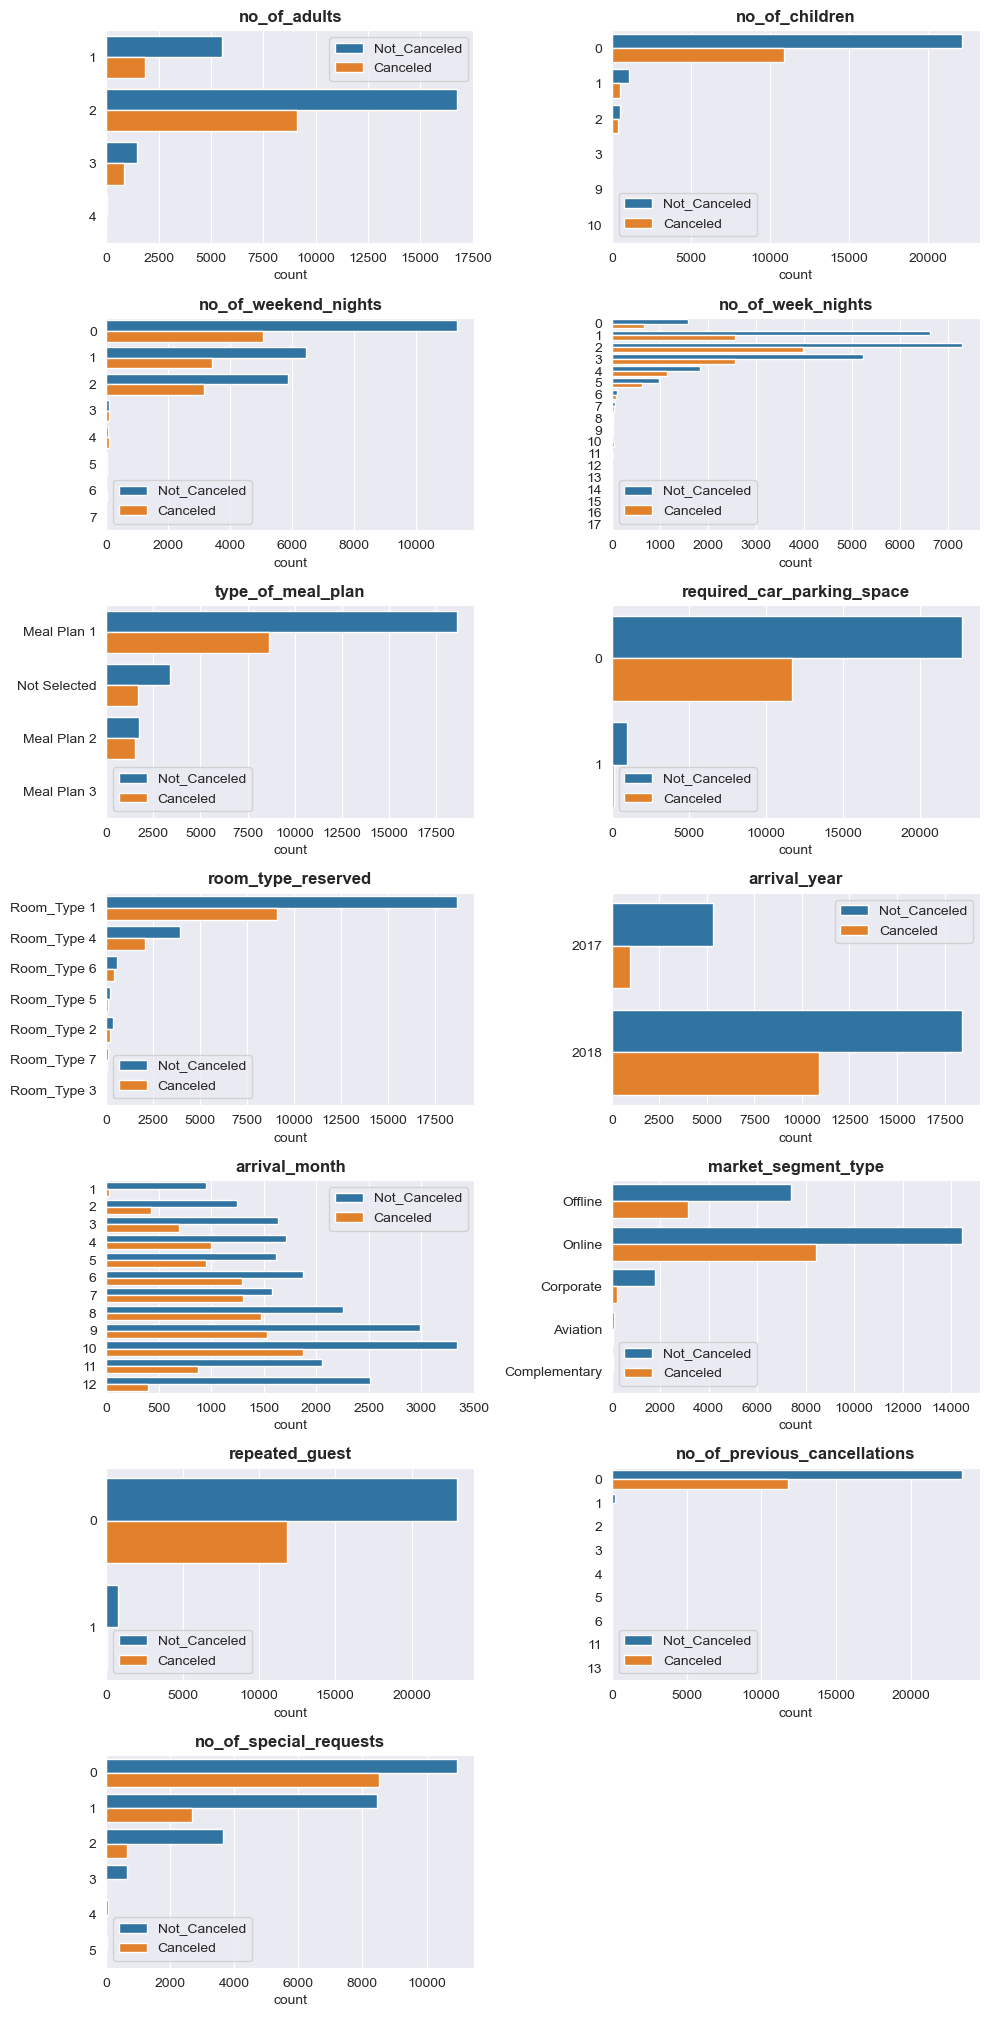

In [33]:
columns = ['no_of_adults','no_of_children','no_of_weekend_nights',
           'no_of_week_nights','type_of_meal_plan','required_car_parking_space',
           'room_type_reserved','arrival_year','arrival_month',
           'market_segment_type','repeated_guest','no_of_previous_cancellations',
           'no_of_special_requests']
plt.figure(figsize=(10,40))
for i,col in enumerate(columns):
    ax = plt.subplot(14,2,i+1)
    sns.countplot(y=df[col], hue=df['booking_status'])
    plt.title(col,fontweight='bold')
    plt.ylabel(None)
    plt.legend(loc='best')
plt.tight_layout()
plt.show()


Что можно сказать из графиков:
1) Если гость уже не в первый раз бронирует номер в отеле, то он не отменит свою бронь
2) Чем больше гость указывает предпочтений перед бронью, тем меньше шанс, что он отменит
3) Больше всего шанс отмены именно в онлайн - сегменте

<Axes: xlabel='arrival_date', ylabel='Count'>

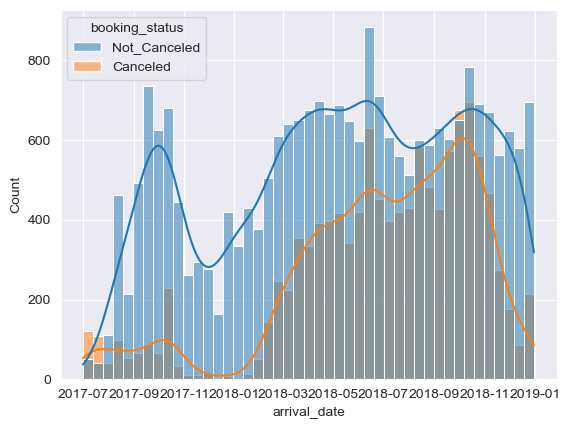

In [34]:
sns.histplot(x='arrival_date',hue='booking_status',data=df,kde=True)

По данному графику видно, что количество резервирований остается примерно на одном уровне, в то время как количество отмен растет

<Axes: xlabel='arrival_month', ylabel='Count'>

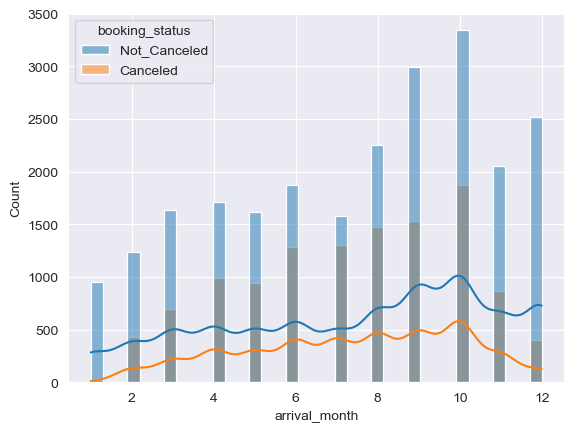

In [35]:
sns.histplot(x='arrival_month',hue='booking_status',data=df,kde=True)

Исходя из графика видно, что наибольшее число отмен брони происходят в период с августа по октябрь, что также связано с увеличением количества броней в общем случае. В общем случае повышенный шанс отмены происходит в конце весны и всё лето, что также связано с повышением спроса на номера в отелях.

In [36]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_day', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'total_guests_number', 'no_previous_booking', 'arrival_date',
       'total_time_to_stay'],
      dtype='object')

Рассмотрим данные относительно переменных "общее количество прошлых бронирований", "количество отмененных бронирований" и "количество прошлых бронирований "


Percentage Canceled for 1 person/people: 24.87%
Percentage Canceled for 2 person/people: 34.89%
Percentage Canceled for 3 person/people: 36.44%
Percentage Canceled for 4 person/people: 43.98%
Percentage Canceled for 5 person/people: 38.46%
Percentage Canceled for 10 person/people: 0.00%
Percentage Canceled for 11 person/people: 100.00%
Percentage Canceled for 12 person/people: 0.00%


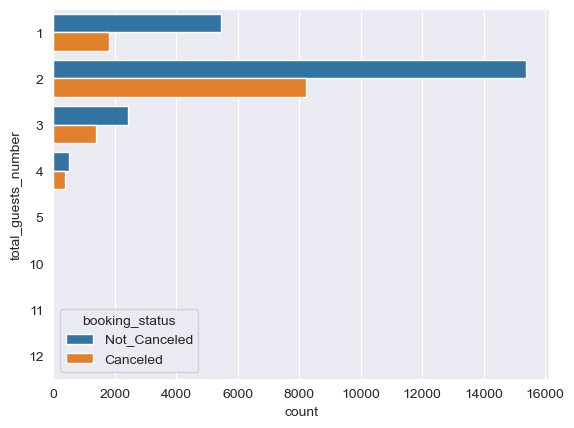

In [37]:
sns.countplot(y=df['total_guests_number'], hue=df['booking_status'])


crosstab_data = pd.crosstab(df['total_guests_number'], df['booking_status'])


crosstab_data['Percentage_Canceled'] = (crosstab_data['Canceled'] / (crosstab_data['Canceled'] + crosstab_data['Not_Canceled'])) * 100


for total_guests_number, percentage_canceled in crosstab_data['Percentage_Canceled'].items():
    print(f"Percentage Canceled for {total_guests_number} person/people: {percentage_canceled:.2f}%")

plt.show()

Как мы видим, самый низкий процент отмен у меньшего количества гостей(данные, где больше 4 гостей брать в такой расчет не стоит за маленьким объемом выборки, что показано ниже)

In [38]:
df.total_guests_number.value_counts()

2     23597
1      7257
3      3820
4       905
5        13
12        1
10        1
11        1
Name: total_guests_number, dtype: int64

Рассмотрим данные относительно прошлого количества бронирований

In [39]:
crosstab_data = pd.crosstab(df['no_previous_booking'], df['booking_status'])

crosstab_data['Percentage_Canceled'] = (crosstab_data['Canceled'] / (
            crosstab_data['Canceled'] + crosstab_data['Not_Canceled'])) * 100

for no_previous_booking, percentage_canceled in crosstab_data['Percentage_Canceled'].items():
    print(f"Percentage Canceled for {no_previous_booking}: {percentage_canceled:.2f}%")

plt.show()

Percentage Canceled for 0: 33.97%
Percentage Canceled for 1: 3.06%
Percentage Canceled for 2: 0.00%
Percentage Canceled for 3: 0.00%
Percentage Canceled for 4: 0.00%
Percentage Canceled for 5: 2.38%
Percentage Canceled for 6: 0.00%
Percentage Canceled for 7: 3.70%
Percentage Canceled for 8: 0.00%
Percentage Canceled for 9: 0.00%
Percentage Canceled for 10: 0.00%
Percentage Canceled for 11: 0.00%
Percentage Canceled for 12: 0.00%
Percentage Canceled for 13: 0.00%
Percentage Canceled for 14: 36.36%
Percentage Canceled for 15: 8.33%
Percentage Canceled for 16: 0.00%
Percentage Canceled for 17: 0.00%
Percentage Canceled for 18: 0.00%
Percentage Canceled for 19: 0.00%
Percentage Canceled for 20: 0.00%
Percentage Canceled for 21: 0.00%
Percentage Canceled for 22: 0.00%
Percentage Canceled for 23: 0.00%
Percentage Canceled for 24: 0.00%
Percentage Canceled for 25: 0.00%
Percentage Canceled for 26: 0.00%
Percentage Canceled for 27: 0.00%
Percentage Canceled for 28: 0.00%
Percentage Canceled fo

Как мы видим, если гость уже делал не одно бронирование в отеле, то более чем с 96% вероятностью он его не отменит

In [40]:
df[(df['no_previous_booking']>0)&(df['no_of_previous_bookings_not_canceled']>0)]['booking_status']

Booking_ID
INN00089    Not_Canceled
INN00156    Not_Canceled
INN00322    Not_Canceled
INN00334    Not_Canceled
INN00352    Not_Canceled
                ...     
INN35838    Not_Canceled
INN35881    Not_Canceled
INN36000    Not_Canceled
INN36030    Not_Canceled
INN36111    Not_Canceled
Name: booking_status, Length: 690, dtype: object

In [41]:
filtered_df = df[(df['no_previous_booking'] > 0) & (df['no_of_previous_bookings_not_canceled'] > 0)]['booking_status'].value_counts()

# Получаем отношение 'Canceled' к 'Not_Canceled'
ratio_canceled_to_not_canceled = filtered_df['Canceled'] / filtered_df['Not_Canceled']

print(f"Отношение 'Canceled' к 'Not_Canceled': {ratio_canceled_to_not_canceled:.2f}")

Отношение 'Canceled' к 'Not_Canceled': 0.01


Если у человека уже было не отмененное бронирование, то новое бронирование он не отменит c 99% вероятностью

In [42]:
df[(df['no_previous_booking']>0)&(df['no_of_previous_cancellations']>0)]['booking_status']
filtered_df = df[(df['no_previous_booking'] > 0) & (df['no_of_previous_cancellations'] > 0)]['booking_status'].value_counts()

# Получаем отношение 'Canceled' к 'Not_Canceled'
ratio_canceled_to_not_canceled = filtered_df['Canceled'] / filtered_df['Not_Canceled']

print(f"Отношение 'Canceled' к 'Not_Canceled': {ratio_canceled_to_not_canceled:.2f}")

Отношение 'Canceled' к 'Not_Canceled': 0.06


Если у человека уже было отменено хотя бы одно бронирование, то и с большой вероятностью он его не отменит. Это может быть связано с форс-мажорными ситуациями при прошлом бронировании

Percentage Canceled for 1: 23.13%
Percentage Canceled for 2: 34.76%
Percentage Canceled for 3: 35.86%
Percentage Canceled for 4: 32.96%
Percentage Canceled for 5: 31.87%
Percentage Canceled for 6: 45.21%
Percentage Canceled for 7: 39.18%
Percentage Canceled for 8: 44.13%
Percentage Canceled for 9: 48.62%
Percentage Canceled for 10: 53.21%
Percentage Canceled for 11: 36.84%
Percentage Canceled for 12: 62.50%
Percentage Canceled for 13: 82.35%
Percentage Canceled for 14: 87.10%
Percentage Canceled for 15: 83.87%
Percentage Canceled for 16: 83.33%
Percentage Canceled for 17: 80.00%
Percentage Canceled for 18: 100.00%
Percentage Canceled for 19: 83.33%
Percentage Canceled for 20: 72.73%
Percentage Canceled for 21: 75.00%
Percentage Canceled for 22: 100.00%
Percentage Canceled for 23: 50.00%
Percentage Canceled for 24: 100.00%


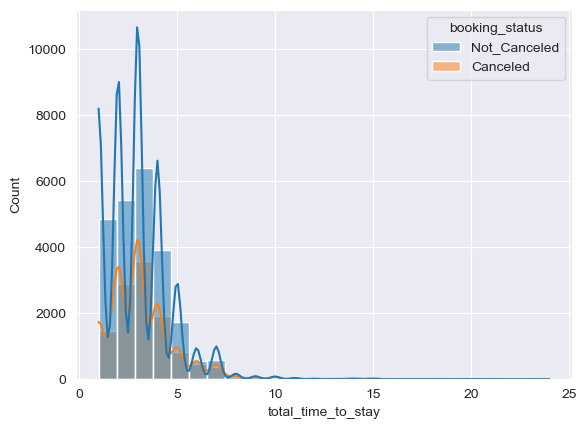

3     9973
2     8314
1     6317
4     5852
5     2567
6     1024
7      970
8      179
9      109
10     109
11      38
14      31
15      31
12      24
13      17
20      11
19       6
16       6
17       5
21       4
18       3
23       2
22       2
24       1
Name: total_time_to_stay, dtype: int64

In [43]:
sns.histplot(x='total_time_to_stay',hue='booking_status',data=df,kde=True, bins= 25)
crosstab_data = pd.crosstab(df['total_time_to_stay'], df['booking_status'])

crosstab_data['Percentage_Canceled'] = (crosstab_data['Canceled'] / (
        crosstab_data['Canceled'] + crosstab_data['Not_Canceled'])) * 100

for total_time_to_stay, percentage_canceled in crosstab_data['Percentage_Canceled'].items():
    print(f"Percentage Canceled for {total_time_to_stay}: {percentage_canceled:.2f}%")

plt.show()
df['total_time_to_stay'].value_counts()

Как видно из графика и написанных значений процента отмененных бронирований, средний процент отмены находится на уровне 30-40%, потому как ликвидными для анализа являются данные, где количество дней пребывания меньше 10(размер выборки позволяет делать вывод в данном случае позволяет делать какие-либо выводы)

"Количество дней между датой бронирования и датой прибытия"

Промежуток дней: (0, 20], Процент отмененных бронирований: 13.96%
Промежуток дней: (20, 40], Процент отмененных бронирований: 22.72%
Промежуток дней: (40, 60], Процент отмененных бронирований: 23.86%
Промежуток дней: (60, 80], Процент отмененных бронирований: 28.47%
Промежуток дней: (80, 100], Процент отмененных бронирований: 30.75%
Промежуток дней: (100, 120], Процент отмененных бронирований: 42.62%
Промежуток дней: (120, 140], Процент отмененных бронирований: 35.68%
Промежуток дней: (140, 160], Процент отмененных бронирований: 44.75%
Промежуток дней: (160, 180], Процент отмененных бронирований: 68.74%
Промежуток дней: (180, 200], Процент отмененных бронирований: 70.85%
Промежуток дней: (200, 220], Процент отмененных бронирований: 69.25%
Промежуток дней: (220, 240], Процент отмененных бронирований: 65.38%
Промежуток дней: (240, 260], Процент отмененных бронирований: 77.93%
Промежуток дней: (260, 280], Процент отмененных бронирований: 76.34%
Промежуток дней: (280, 300], Процент отменен

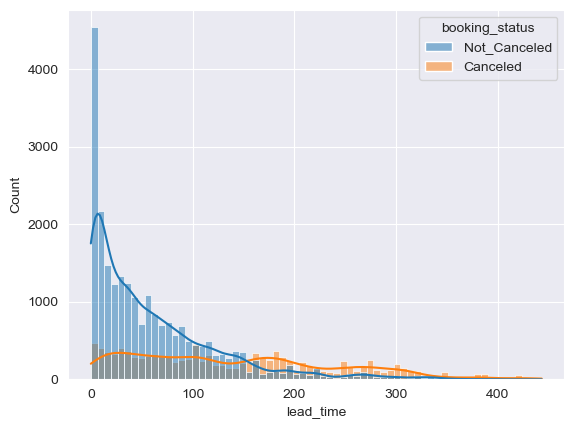

In [45]:
sns.histplot(x='lead_time',hue='booking_status',data=df,kde=True)

df['lead_time_bins'] = pd.cut(df['lead_time'], bins=range(0, int(df['lead_time'].max()) + 21, 20))
crosstab_data = pd.crosstab(df['lead_time_bins'], df['booking_status'])
crosstab_data['Percentage_Canceled'] = (crosstab_data['Canceled'] / (crosstab_data['Canceled'] + crosstab_data['Not_Canceled'])) * 100
for avg_price_bin, percentage_canceled in zip(crosstab_data.index, crosstab_data['Percentage_Canceled']):
    print(f"Промежуток дней: {avg_price_bin}, Процент отмененных бронирований: {percentage_canceled:.2f}%")
average_percentage_canceled = crosstab_data['Percentage_Canceled'].mean()
print(f"Средний процент отмененных бронирований по фрагментам: {average_percentage_canceled:.2f}%")
df.drop('lead_time_bins', axis=1, inplace=True)

Как мы видим, данные имеют log-нормальное распределение. Видно, что чем меньше времени остается до даты бронирования, тем меньше процент отмены, особенно в начальных сегментах(что может быть связано с резкой необходимостью в жилье на отдыхе). Также стоит отметить, что приемлемый уровень отмен бронирования сохраняет свою тенденцию примерно до промежутка в 100 дней, далее наблюдается резкое возрастание уровня отмен брони(что может быть связано с тем, что в большем промежутке между временем бронирования и заселением может произойти большее количество форс-мажорных ситуаций, которые могут побудить людей отменить бронирование).

Данные по бронированию номеров относительно средней цены за номер подчинены закону нормального распределения (действительные и отмененные бронирования также), о чем свидетельствуют ядерные оценки плотности данного набора. Я разделил данные на промежутки по 15, чтобы лучше посмотреть в более доверительной форме, каков процент отмен по сегментам(также привел среднее значение для всего набора, но среднее наиболее подвержено выбросам и экстремальным значениям, потому и приведены данные по сегментам)

Промежуток цен: (0, 15], Процент отмененных бронирований: 10.00%
Промежуток цен: (15, 30], Процент отмененных бронирований: 50.00%
Промежуток цен: (30, 45], Процент отмененных бронирований: 3.27%
Промежуток цен: (45, 60], Процент отмененных бронирований: 19.02%
Промежуток цен: (60, 75], Процент отмененных бронирований: 21.89%
Промежуток цен: (75, 90], Процент отмененных бронирований: 26.93%
Промежуток цен: (90, 105], Процент отмененных бронирований: 32.50%
Промежуток цен: (105, 120], Процент отмененных бронирований: 46.89%
Промежуток цен: (120, 135], Процент отмененных бронирований: 40.91%
Промежуток цен: (135, 150], Процент отмененных бронирований: 34.44%
Промежуток цен: (150, 165], Процент отмененных бронирований: 35.16%
Промежуток цен: (165, 180], Процент отмененных бронирований: 34.00%
Промежуток цен: (180, 195], Процент отмененных бронирований: 26.08%
Промежуток цен: (195, 210], Процент отмененных бронирований: 38.36%
Промежуток цен: (210, 225], Процент отмененных бронирований: 60

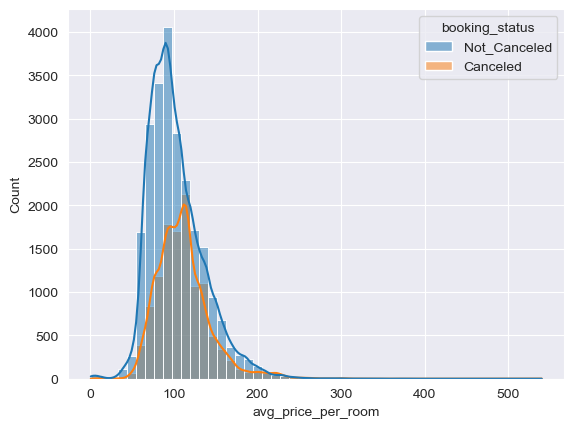

In [44]:
sns.histplot(x='avg_price_per_room',hue='booking_status',data=df,kde=True, bins = 50)

df['avg_price_per_room_bins'] = pd.cut(df['avg_price_per_room'], bins=range(0, int(df['avg_price_per_room'].max()) + 16, 15))
crosstab_data = pd.crosstab(df['avg_price_per_room_bins'], df['booking_status'])
crosstab_data['Percentage_Canceled'] = (crosstab_data['Canceled'] / (crosstab_data['Canceled'] + crosstab_data['Not_Canceled'])) * 100
for avg_price_bin, percentage_canceled in zip(crosstab_data.index, crosstab_data['Percentage_Canceled']):
    print(f"Промежуток цен: {avg_price_bin}, Процент отмененных бронирований: {percentage_canceled:.2f}%")
average_percentage_canceled = crosstab_data['Percentage_Canceled'].mean()
print(f"Средний процент отмененных бронирований по фрагментам: {average_percentage_canceled:.2f}%")
df.drop('avg_price_per_room_bins', axis=1, inplace=True)

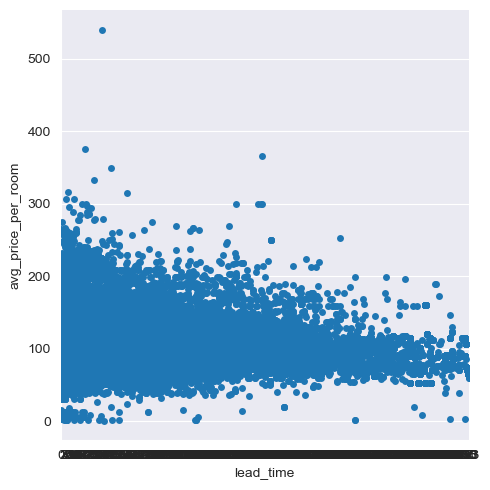

In [46]:
sns.catplot(x = df['lead_time'], y = df['avg_price_per_room'])


Видно, что чем раньше сделано бронирование. тем дешевле будет цена

<Axes: xlabel='market_segment_type', ylabel='avg_price_per_room'>

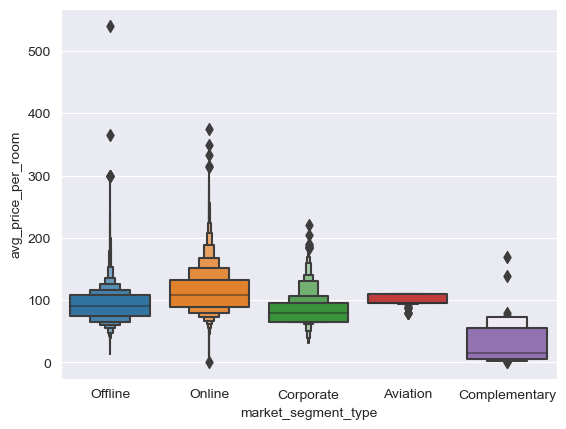

In [47]:
sns.boxenplot(x=df['market_segment_type'],y = df['avg_price_per_room'],data=df)

В среднем номера дороже приобретаются в онлайн-сегменте

<Axes: xlabel='type_of_meal_plan', ylabel='avg_price_per_room'>

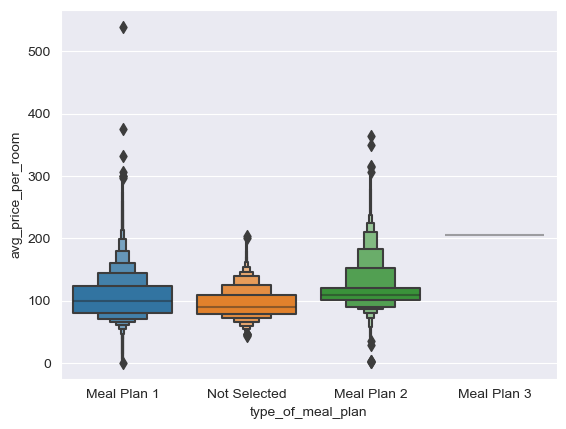

In [48]:
sns.boxenplot(x='type_of_meal_plan',y = 'avg_price_per_room',data=df)

Не видно, какой-то сильной разницы в ценах по питанию, разве что второй дороже первого, а третий второго

<Axes: xlabel='total_guests_number', ylabel='avg_price_per_room'>

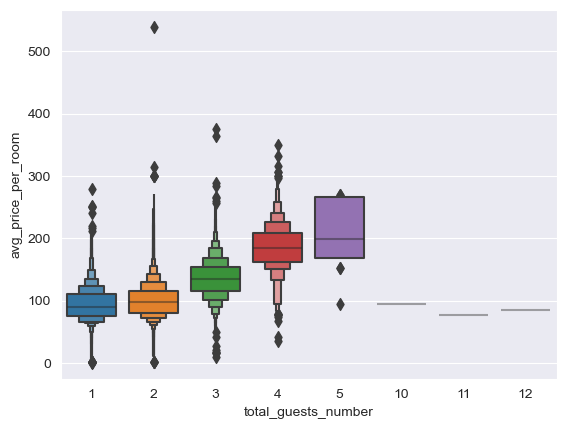

In [49]:
sns.boxenplot(x='total_guests_number',y = 'avg_price_per_room',data=df)

Как видим, с ростом количества гостей увеличивается и чек

<Axes: xlabel='required_car_parking_space', ylabel='avg_price_per_room'>

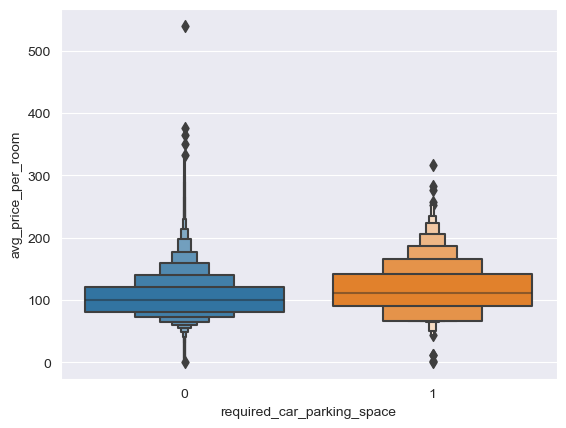

In [50]:
sns.boxenplot(x='required_car_parking_space',y = 'avg_price_per_room',data=df)

Наличие парковочного места не сильно влияет на цену

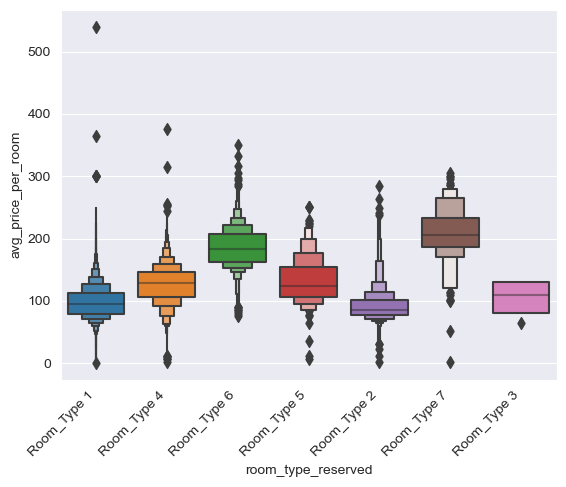

In [51]:
sns.boxenplot(x='room_type_reserved',y = 'avg_price_per_room',data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

Самые дорогие типы комнат - 6 и 7

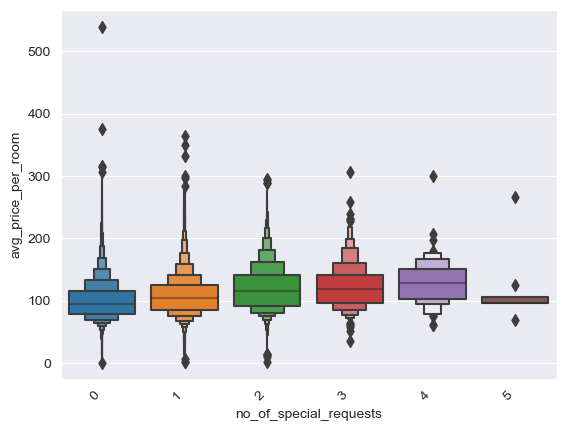

In [52]:
sns.boxenplot(x='no_of_special_requests',y = 'avg_price_per_room',data=df)
plt.xticks(rotation=45, ha='right')
plt.show()

Количество пожеланий не влияет на цену номера

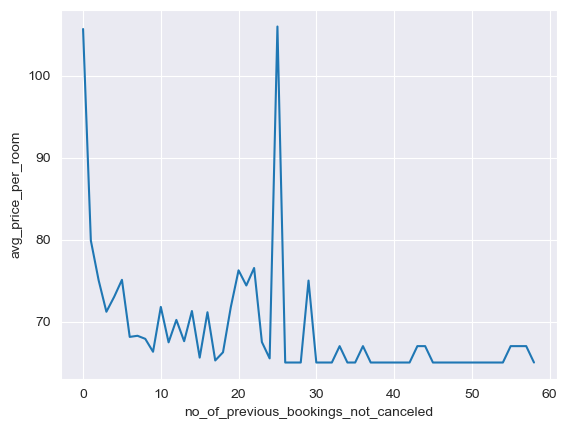

In [57]:
sns.lineplot(x=df['no_of_previous_bookings_not_canceled'], y=df['avg_price_per_room'],errorbar=None)
plt.show()

Как видно, возможно, имеется корреляция меду количеством прошлых успешных бронирований, но такая корреляция виднеется только на малых количествах прошлых бронирований

In [54]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_day', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'total_guests_number', 'no_previous_booking', 'arrival_date',
       'total_time_to_stay'],
      dtype='object')

СОЗДАНИЕ И ОБУЧЕНИЕ МОДЕЛЕЙ ДЛЯ ПРЕДСКАЗЫВАНИЯ

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35595 entries, INN00001 to INN36275
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   no_of_adults                          35595 non-null  int64         
 1   no_of_children                        35595 non-null  int64         
 2   no_of_weekend_nights                  35595 non-null  int64         
 3   no_of_week_nights                     35595 non-null  int64         
 4   type_of_meal_plan                     35595 non-null  object        
 5   required_car_parking_space            35595 non-null  int64         
 6   room_type_reserved                    35595 non-null  object        
 7   lead_time                             35595 non-null  int64         
 8   arrival_year                          35595 non-null  int64         
 9   arrival_month                         35595 non-null  int64        

In [76]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [79]:
data = df.copy()

data = data.drop('arrival_date',axis=1)
cat = data.select_dtypes(include='O')
cat.sample()

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
Booking_ID,,,,
INN11086,Meal Plan 1,Room_Type 4,Online,Not_Canceled


In [80]:
le = LabelEncoder()

encode = list(cat)
data[encode] = data[encode].apply(lambda x: le.fit_transform(x))
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_guests_number,no_previous_booking,total_time_to_stay
Booking_ID,,,,,,,,,,,,,,,,,,,,,
INN00001,2,0,1,2,0,0,0,224,2017,10,...,3,0,0,0,65.00,0,1,2,0,3
INN00002,2,0,2,3,3,0,0,5,2018,11,...,4,0,0,0,106.68,1,1,2,0,5
INN00003,1,0,2,1,0,0,0,1,2018,2,...,4,0,0,0,60.00,0,0,1,0,3
INN00004,2,0,0,2,0,0,0,211,2018,5,...,4,0,0,0,100.00,0,0,2,0,2
INN00005,2,0,1,1,3,0,0,48,2018,4,...,4,0,0,0,94.50,0,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INN36271,3,0,2,6,0,0,3,85,2018,8,...,4,0,0,0,167.80,1,1,3,0,8
INN36272,2,0,1,3,0,0,0,228,2018,10,...,4,0,0,0,90.95,2,0,2,0,4
INN36273,2,0,2,6,0,0,0,148,2018,7,...,4,0,0,0,98.39,2,1,2,0,8


<Axes: >

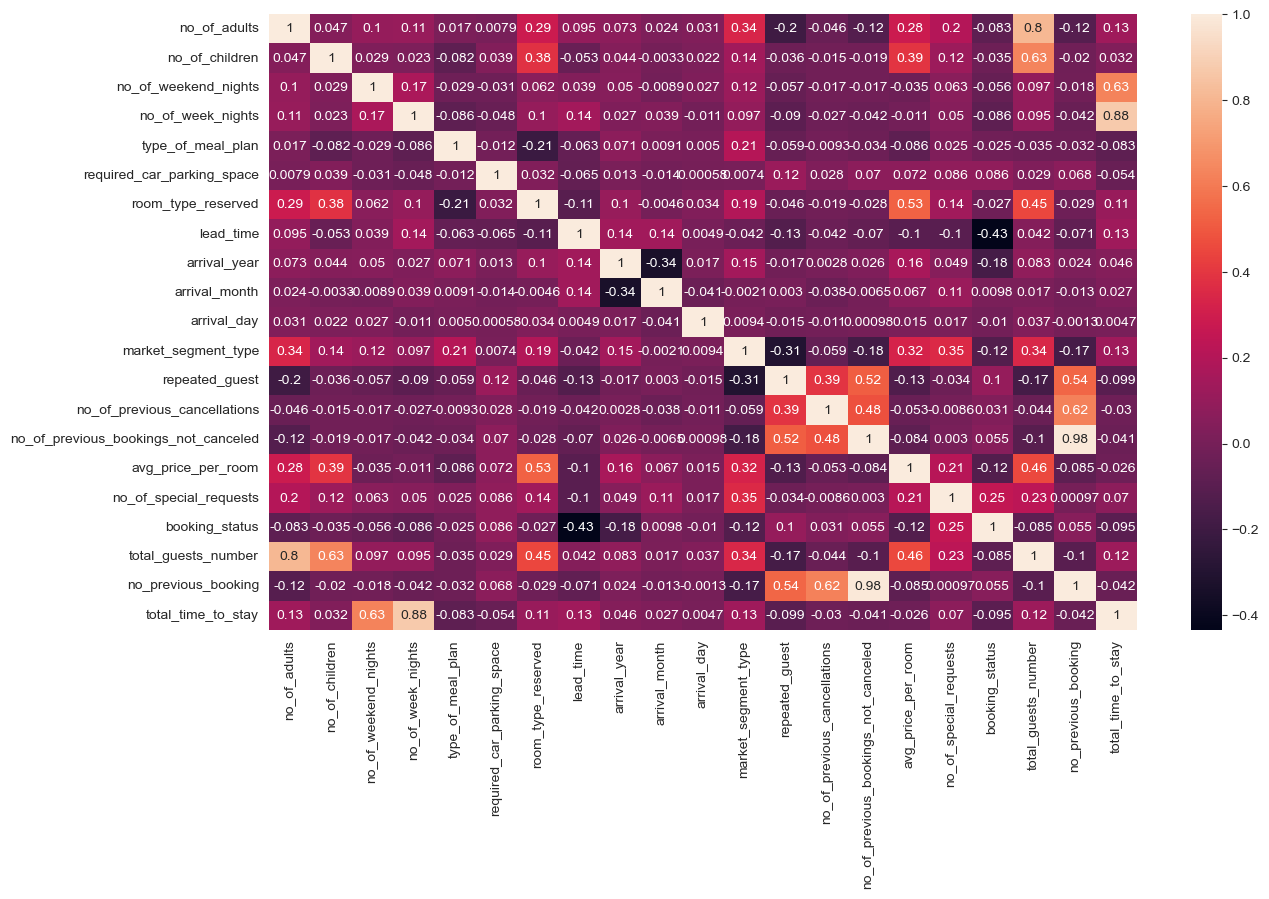

In [81]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(),annot=True)

Показана тепловая карта корреляций предикторов. Из интересного могу отметить наличие связи между временем между датой брони и датой заезда, средней ценой за номер и его типом, а также типом номера и количеством гостей

In [82]:
data = pd.get_dummies(data, columns=['arrival_year'])

In [83]:
y = data['booking_status']
x = data.drop('booking_status',axis=1)

xtrain,xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=424242)
print(xtrain.shape, xtest.shape)
print(ytrain.shape,ytest.shape)

(24916, 21) (10679, 21)
(24916,) (10679,)


Делим выборку на обучающую и тестовые

In [84]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)
print(xtrain)

[[-1.702915   -0.25227533 -0.93413245 ... -1.13538291 -0.46336119
   0.46336119]
 [ 0.28350027 -0.25227533 -0.93413245 ... -0.01822621 -0.46336119
   0.46336119]
 [-1.702915   -0.25227533  0.21026936 ... -0.01822621 -0.46336119
   0.46336119]
 ...
 [-1.702915    2.34619188 -0.93413245 ... -0.57680456 -0.46336119
   0.46336119]
 [ 0.28350027 -0.25227533 -0.93413245 ...  0.54035214 -0.46336119
   0.46336119]
 [ 0.28350027 -0.25227533  1.35467117 ...  2.2160872  -0.46336119
   0.46336119]]


In [85]:
models = {
    'DECISION_TREE':DecisionTreeClassifier(),
    'RANDOM_FOREST':RandomForestClassifier(),
    'GRADIENT':GradientBoostingClassifier(),
    'EXTRA_TREES':ExtraTreesClassifier(),
    'KNeighbours':KNeighborsClassifier(),
    'LogisticRegression':LogisticRegression()
}

Name: DECISION_TREE
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      3608
           1       0.90      0.90      0.90      7071

    accuracy                           0.86     10679
   macro avg       0.85      0.85      0.85     10679
weighted avg       0.86      0.86      0.86     10679





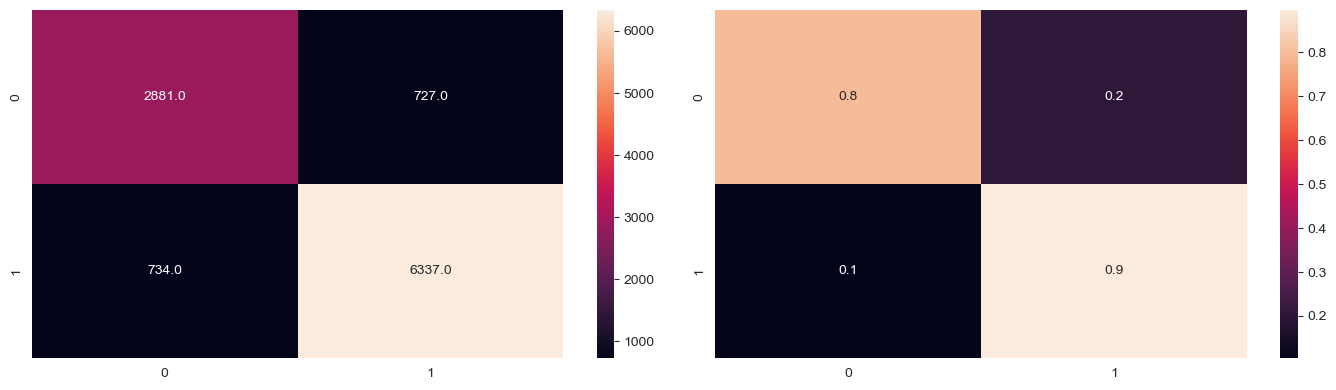


Name: RANDOM_FOREST
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      3608
           1       0.90      0.94      0.92      7071

    accuracy                           0.90     10679
   macro avg       0.89      0.87      0.88     10679
weighted avg       0.90      0.90      0.90     10679





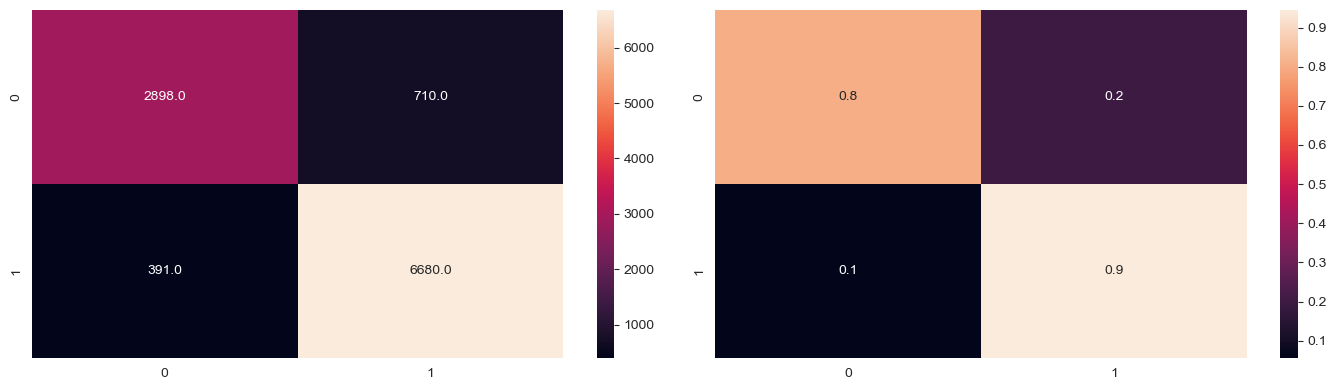


Name: GRADIENT
              precision    recall  f1-score   support

           0       0.82      0.68      0.75      3608
           1       0.85      0.93      0.89      7071

    accuracy                           0.84     10679
   macro avg       0.84      0.80      0.82     10679
weighted avg       0.84      0.84      0.84     10679





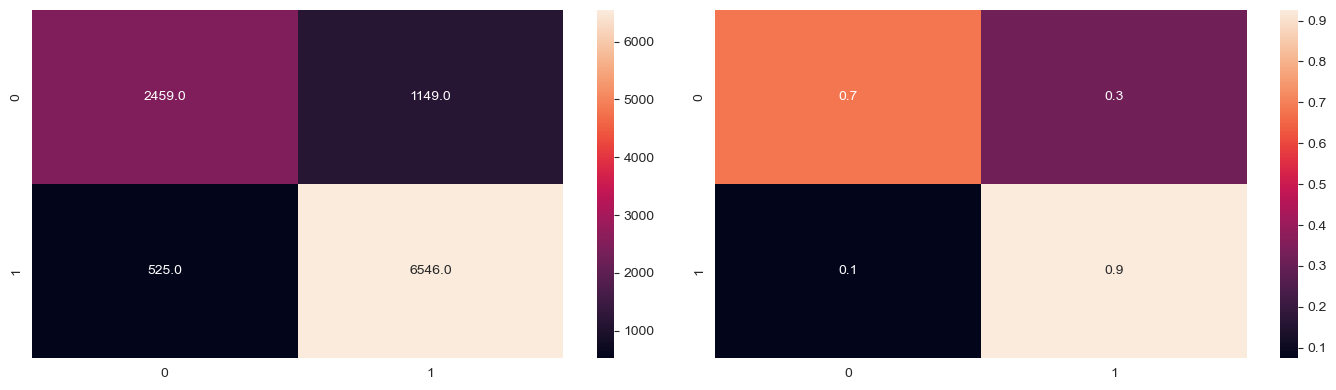


Name: EXTRA_TREES
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      3608
           1       0.90      0.94      0.92      7071

    accuracy                           0.89     10679
   macro avg       0.88      0.87      0.87     10679
weighted avg       0.89      0.89      0.89     10679





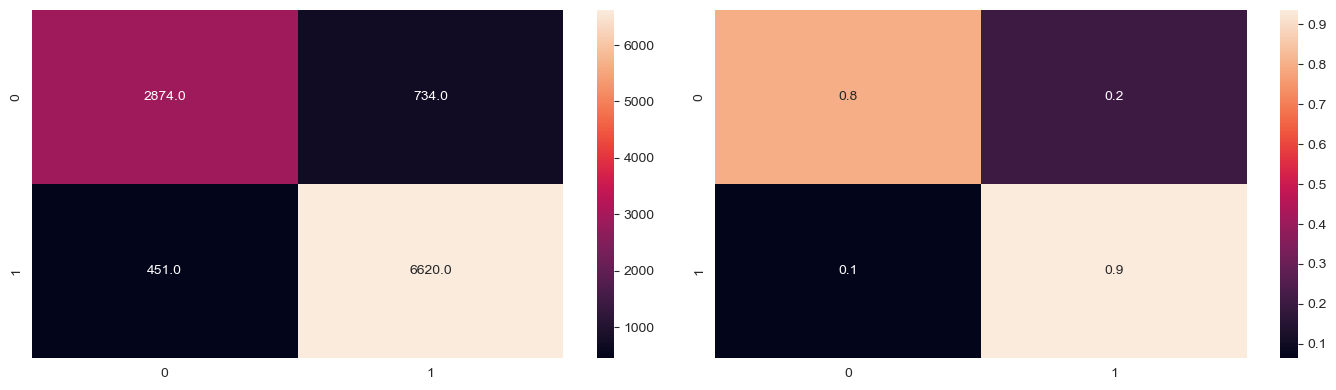


Name: KNeighbours
              precision    recall  f1-score   support

           0       0.78      0.73      0.75      3608
           1       0.87      0.90      0.88      7071

    accuracy                           0.84     10679
   macro avg       0.82      0.81      0.82     10679
weighted avg       0.84      0.84      0.84     10679





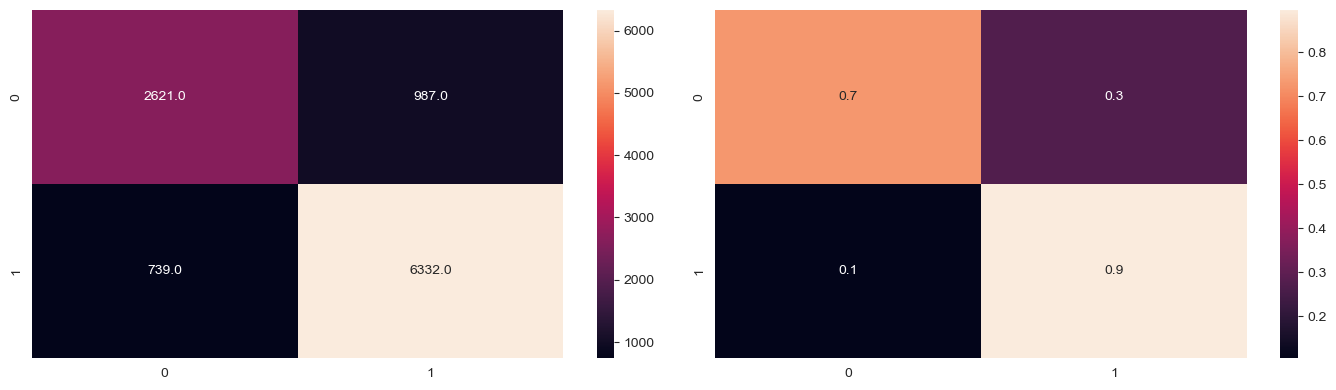


Name: LogisticRegression
              precision    recall  f1-score   support

           0       0.75      0.61      0.67      3608
           1       0.82      0.90      0.86      7071

    accuracy                           0.80     10679
   macro avg       0.78      0.75      0.76     10679
weighted avg       0.80      0.80      0.79     10679





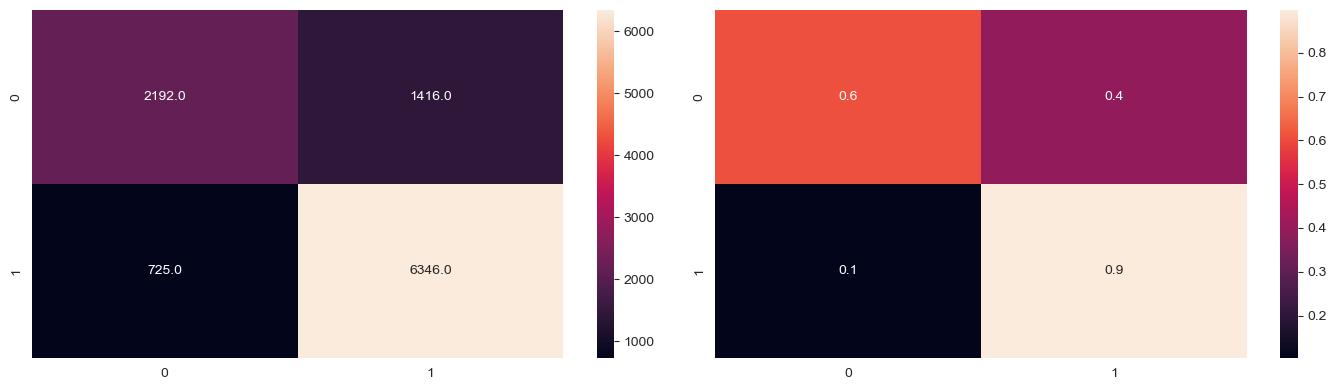

In [87]:
maxv = 0
best = ''
for name,model in models.items():
    print('Name:', name)
    model.fit(xtrain,ytrain)
    y_pred = model.predict(xtest)
    score = model.score(xtest, ytest)
    print(classification_report(ytest,y_pred))
    report = classification_report(ytest, y_pred, output_dict=True)
    f1_score_value = report['weighted avg']['f1-score']
    if f1_score_value>maxv:
        maxv = f1_score_value
        best = name
    print()
    print()

    cm = confusion_matrix(ytest,y_pred)
    cm_ = cm/cm.sum(axis=1).reshape(-1,1)

    fig, ax = plt.subplots(1,2,figsize=(14,4))
    sns.heatmap(cm, annot=True,fmt='.1f',ax=ax[0])
    sns.heatmap(cm_, annot=True,fmt='.1f',ax=ax[1])
    plt.tight_layout()
    plt.show()
    print('='*80)
    print()

In [88]:
print(best)
print(maxv)

RANDOM_FOREST
0.8956533326880778


Я провел выборку из классификаторов и установил, что лучшим классификатором является рандомный лес, потому как он показал лучшую точность и f1-метрику на тестовых данных. Также покажу, какие переменные он считает наиболее важными для предсказания

RandomForestClassifier()


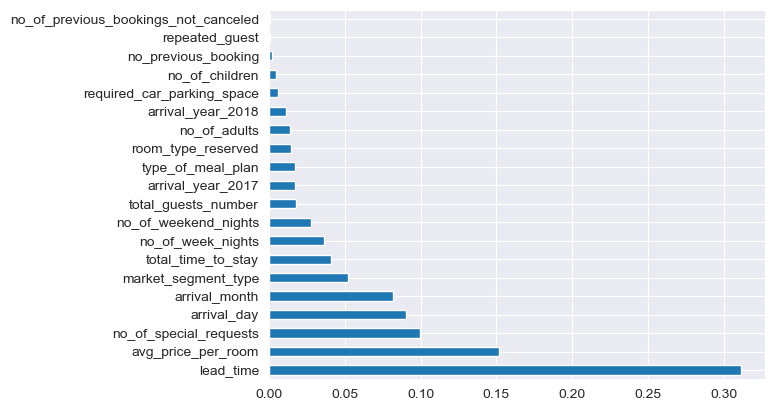

In [90]:
model = RandomForestClassifier()
model.fit(x,y)
print(model)
importance = pd.Series(model.feature_importances_, index=x.columns)
importance.nlargest(20).plot(kind='barh')
plt.show()

Оказалось, что наиболее важными предикторами для правильной классификации являются время между бронью и заездом, а также средняя цена за номер.

Проведенный мною анализ гостиничного номера позволяет лучше выявлять зависимости между различными предикторами, а построенная мною модель, основанная на рандомном лесе, поможет лучше определять, откажется ли от бронирования постоялец или нет. Данные предсказания могут предоставить возможность